In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from kerastuner import Hyperband, HyperModel
from tensorflow.keras import layers

In [2]:
dataset = pd.read_csv('data/winequality/winequality-red.csv', delimiter=';')
dataset = dataset.dropna()

train_dataset = dataset.sample(frac=0.8, random_state=0)
val_test_dataset = dataset.drop(train_dataset.index)
val_dataset = val_test_dataset.sample(frac=0.5, random_state=0)
test_dataset = val_test_dataset.drop(val_dataset.index)

train_features = train_dataset.copy()
val_features = val_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('quality')
val_labels = val_features.pop('quality')
test_labels = test_features.pop('quality')

In [3]:
min_value = 1
max_value = 8
step_size = 1

class DeepHyperModel(HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential([
            layers.experimental.preprocessing.Normalization(),
            layers.Dense(units=hp.Int(
                'units_1',
                min_value=min_value,
                max_value=max_value,
                step=step_size
            ), activation='relu'),
            layers.Dense(units=hp.Int(
                'units_2',
                min_value=min_value,
                max_value=max_value,
                step=step_size
            ), activation='relu'),
            layers.Dense(units=hp.Int(
                'units_3',
                min_value=min_value,
                max_value=max_value,
                step=step_size
            ), activation='relu'),
            layers.Dense(units=hp.Int(
                'units_4',
                min_value=min_value,
                max_value=max_value,
                step=step_size
            ), activation='relu'),
            layers.Dense(units=hp.Int(
                'units_5',
                min_value=min_value,
                max_value=max_value,
                step=step_size
            ), activation='relu'),
            layers.Dense(units=hp.Int(
                'units_6',
                min_value=min_value,
                max_value=max_value,
                step=step_size
            ), activation='relu'),
            layers.Dense(units=hp.Int(
                'units_7',
                min_value=min_value,
                max_value=max_value,
                step=step_size
            ), activation='relu'),
            layers.Dense(units=hp.Int(
                'units_8',
                min_value=min_value,
                max_value=max_value,
                step=step_size
            ), activation='relu'),
            layers.Dense(1)
        ])

        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float(
                'learning_rate',
                min_value=1e-6,
                max_value=0.01,
                sampling='LOG'
            )),
            loss='mean_squared_error'
        )
        return model

In [4]:
HYPERBAND_MAX_EPOCHS = 200
EXECUTION_PER_TRIAL = 3

hypermodel = DeepHyperModel()

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective='val_loss',
    seed=42,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='hyperband',
    project_name='deep_net'
)

tuner.search_space_summary()

INFO:tensorflow:Reloading Oracle from existing project hyperband/deep_net/oracle.json
INFO:tensorflow:Reloading Tuner from hyperband/deep_net/tuner0.json
Search space summary
Default search space size: 9
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': None}
units_6 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': None}
units_7 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': None}
units_8 (Int)
{'def

In [5]:
tuner.search(train_features, train_labels, validation_data=(val_features, val_labels))

INFO:tensorflow:Oracle triggered exit


In [6]:
best_model = tuner.get_best_models(num_models=1)[0]

In [15]:
best_hps = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_features, train_labels, validation_data=(val_features, val_labels), epochs=200)

Epoch 1/200
40/40 [==============================] - 0s 3ms/step - loss: 31.1665 - val_loss: 27.0144
Epoch 2/200
40/40 [==============================] - 0s 952us/step - loss: 17.1926 - val_loss: 7.4353
Epoch 3/200
40/40 [==============================] - 0s 953us/step - loss: 5.8021 - val_loss: 5.1508
Epoch 4/200
40/40 [==============================] - 0s 976us/step - loss: 4.3178 - val_loss: 3.7366
Epoch 5/200
40/40 [==============================] - 0s 941us/step - loss: 3.0083 - val_loss: 2.5425
Epoch 6/200
40/40 [==============================] - 0s 938us/step - loss: 1.9353 - val_loss: 1.5872
Epoch 7/200
40/40 [==============================] - 0s 975us/step - loss: 1.1862 - val_loss: 1.0645
Epoch 8/200
40/40 [==============================] - 0s 922us/step - loss: 0.8710 - val_loss: 0.8638
Epoch 9/200
40/40 [==============================] - 0s 986us/step - loss: 0.7680 - val_loss: 0.7673
Epoch 10/200
40/40 [==============================] - 0s 956us/step - loss: 0.7201 - val_l

40/40 [==============================] - 0s 936us/step - loss: 0.4786 - val_loss: 0.3977
Epoch 83/200
40/40 [==============================] - 0s 906us/step - loss: 0.4848 - val_loss: 0.4347
Epoch 84/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4900 - val_loss: 0.4163
Epoch 85/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4803 - val_loss: 0.4084
Epoch 86/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4734 - val_loss: 0.3977
Epoch 87/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4763 - val_loss: 0.4487
Epoch 88/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4782 - val_loss: 0.3878
Epoch 89/200
40/40 [==============================] - 0s 975us/step - loss: 0.4771 - val_loss: 0.3889
Epoch 90/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4725 - val_loss: 0.4099
Epoch 91/200
40/40 [==============================] - 0s 962us/step - loss: 0.4852 - val_loss: 0.3899
Epoch

Epoch 163/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4498 - val_loss: 0.3635
Epoch 164/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4510 - val_loss: 0.3651
Epoch 165/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4518 - val_loss: 0.3604
Epoch 166/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4521 - val_loss: 0.3739
Epoch 167/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4559 - val_loss: 0.3911
Epoch 168/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4497 - val_loss: 0.3593
Epoch 169/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4506 - val_loss: 0.3574
Epoch 170/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4509 - val_loss: 0.3553
Epoch 171/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4499 - val_loss: 0.3641
Epoch 172/200
40/40 [==============================] - 0s 1ms/step - loss: 0.4513 - val_los

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 3

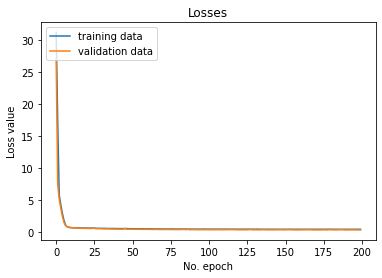

In [17]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Losses')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [18]:
loss = best_model.evaluate(val_features, val_labels)
print(loss)

loss = best_model.evaluate(test_features, test_labels)
print(loss)

5/5 [==============================] - 0s 668us/step - loss: 0.4788
0.47875499725341797
5/5 [==============================] - 0s 742us/step - loss: 0.5645
0.5644645094871521


In [24]:
predicted_test_labels = model.predict(test_features)
print(np.column_stack([predicted_test_labels, test_labels]))

[[5.62930393 5.        ]
 [5.67275095 6.        ]
 [5.41286707 5.        ]
 [5.91618013 5.        ]
 [5.21224022 5.        ]
 [5.50444603 5.        ]
 [5.0693779  5.        ]
 [5.24254227 4.        ]
 [5.59542513 5.        ]
 [5.68423605 5.        ]
 [5.12231112 5.        ]
 [5.74972439 6.        ]
 [5.71963358 7.        ]
 [5.14319611 5.        ]
 [5.30970097 5.        ]
 [5.13594103 5.        ]
 [5.98638248 4.        ]
 [5.05425453 5.        ]
 [5.23267508 5.        ]
 [5.55570412 6.        ]
 [5.52637672 5.        ]
 [5.49290514 5.        ]
 [5.49290514 5.        ]
 [5.43286133 4.        ]
 [5.56216383 5.        ]
 [5.51660347 5.        ]
 [5.09861946 5.        ]
 [6.28669405 7.        ]
 [5.6784811  5.        ]
 [5.96623182 7.        ]
 [5.44412756 5.        ]
 [5.72895575 6.        ]
 [6.0391264  5.        ]
 [5.50491858 5.        ]
 [5.46366262 6.        ]
 [5.5374403  6.        ]
 [6.25714445 6.        ]
 [5.54877567 5.        ]
 [5.14439917 5.        ]
 [5.83813667 6.        ]
